## Загрузка необходимых библиотек

In [1]:
# импорт необходимых библиотек

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%matplotlib inline

## Считывание данных

In [2]:
# считывание обучающего датасета

df_train = pd.read_csv('data/train_dataset_train.csv', index_col='id')
df_train.head()

,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
id,,,,,,,,,,,
1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017


In [3]:
# считывание тестового датасета

df_test = pd.read_csv('data/test_dataset_test.csv', index_col='id')
df_test.head()

,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm
id,,,,,,,,,
1091022,425A13E16226CA01032043111488E0F5,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:03
1091023,F94EDC107A4E054786882F9453C1B93F,Пропуск FacePay,184,Молодёжная (Западный),3010,Молодёжная,3,Арбатско-Покровская,2022-09-12 05:00:45
1091024,8F13BFBA98A7DD34B11BD2DDCC5CA68E,СК студента 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:52
1091025,7B98691636EC418ABF6FEDDE4D7C68FC,КОШЕЛЕК,107,Сокол ( Южн./Вост. ),2018,Сокол,2,Замоскворецкая,2022-09-12 05:00:58
1091026,679C55C28CB36FB546FD104502C0B3DB,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:39


In [4]:
# вывод типа данных в обучающем датасете

df_train.dtypes

ticket_id          object
ticket_type_nm     object
entrance_id         int64
entrance_nm        object
station_id          int64
station_nm         object
line_id             int64
line_nm            object
pass_dttm          object
time_to_under     float64
label               int64
dtype: object

In [5]:
# вывод типа данных в тестовом датасете

df_test.dtypes

ticket_id         object
ticket_type_nm    object
entrance_id        int64
entrance_nm       object
station_id         int64
station_nm        object
line_id            int64
line_nm           object
pass_dttm         object
dtype: object

In [6]:
# смена типа данных

df_train['pass_dttm'] = pd.to_datetime(df_train['pass_dttm'])

In [7]:
# смена типа данных

df_test['pass_dttm'] = pd.to_datetime(df_test['pass_dttm'])

## Генерация новых признаков

In [8]:
# создание новых признаков (день недели, часы, минуты, секунды)

df_train['dayofweek'] = df_train['pass_dttm'].dt.dayofweek
df_train['hour'] = df_train['pass_dttm'].dt.hour
df_train['minute'] = df_train['pass_dttm'].dt.minute
df_train['second'] = df_train['pass_dttm'].dt.second

In [9]:
# создание новых признаков (день недели, часы, минуты, секунды)

df_test['dayofweek'] = df_test['pass_dttm'].dt.dayofweek
df_test['hour'] = df_test['pass_dttm'].dt.hour
df_test['minute'] = df_test['pass_dttm'].dt.minute
df_test['second'] = df_test['pass_dttm'].dt.second

In [10]:
# создание нового признака количество минут с начала дня

df_train['minutes'] = (df_train['hour'] * 60 * 60 + df_train['minute'] * 60 + df_train['second']) / 60

In [11]:
# создание нового признака количество минут с начала дня

df_test['minutes'] = (df_test['hour'] * 60 * 60 + df_test['minute'] * 60 + df_test['second']) / 60

In [12]:
# создание нового признака временных интервалов с начала дня с шагом 30 мин.

df_train['minutes_interval'] = (df_train['minutes'] / 30).round().astype('int')

In [13]:
# создание нового признака временных интервалов с начала дня с шагом 30 мин.

df_test['minutes_interval'] = (df_test['minutes'] / 30).round().astype('int')

In [14]:
# создание нового признака рабочих дней

df_train['is_work_day'] = df_train['dayofweek'].apply(lambda x: 0 if x in [5, 6] else 1)

In [15]:
# создание нового признака рабочих дней

df_test['is_work_day'] = df_test['dayofweek'].apply(lambda x: 0 if x in [5, 6] else 1)

In [16]:
# вывод обучающих данных

df_train.head()

,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label,dayofweek,hour,minute,second,minutes,minutes_interval,is_work_day
id,,,,,,,,,,,,,,,,,,
1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001,0,5,0,13,300.216667,10,1
2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011,0,5,0,54,300.900000,10,1
3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022,0,5,0,55,300.916667,10,1
4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022,0,5,1,13,301.216667,10,1
5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017,0,5,2,55,302.916667,10,1


In [17]:
# сохранение в файл

df_train.to_csv('data/df_train.csv', index=False)

In [18]:
# вывод тестовых данных

df_test.head()

,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,dayofweek,hour,minute,second,minutes,minutes_interval,is_work_day
id,,,,,,,,,,,,,,,,
1091022,425A13E16226CA01032043111488E0F5,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:03,0,5,0,3,300.050000,10,1
1091023,F94EDC107A4E054786882F9453C1B93F,Пропуск FacePay,184,Молодёжная (Западный),3010,Молодёжная,3,Арбатско-Покровская,2022-09-12 05:00:45,0,5,0,45,300.750000,10,1
1091024,8F13BFBA98A7DD34B11BD2DDCC5CA68E,СК студента 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:52,0,5,0,52,300.866667,10,1
1091025,7B98691636EC418ABF6FEDDE4D7C68FC,КОШЕЛЕК,107,Сокол ( Южн./Вост. ),2018,Сокол,2,Замоскворецкая,2022-09-12 05:00:58,0,5,0,58,300.966667,10,1
1091026,679C55C28CB36FB546FD104502C0B3DB,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:39,0,5,1,39,301.650000,10,1


In [19]:
# сохранение в файл

df_test.to_csv('data/df_test.csv', index=False)

## Проверка взаимосвязи признаков

In [20]:
# вычисление корреляции признаков

df_train_corr = df_train.corr()

C:\Users\rus_k\AppData\Local\Temp\ipykernel_1172\768058320.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_train_corr, dtype=np.bool))


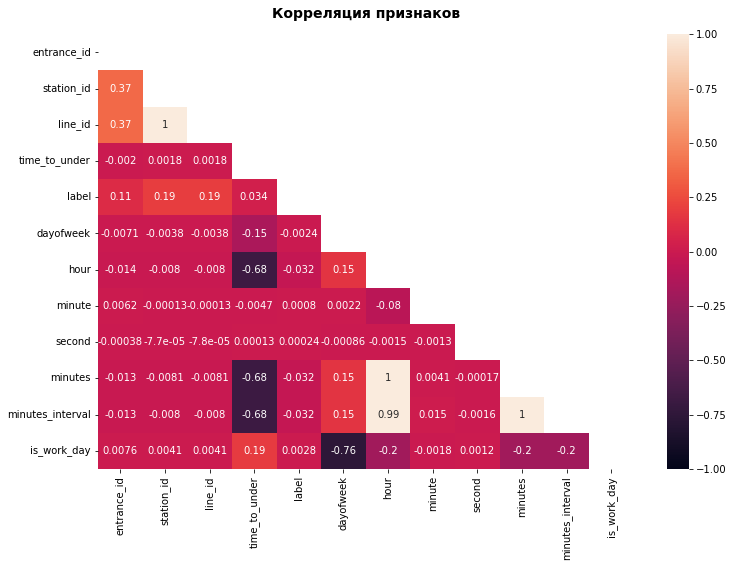

In [21]:
# визуализация корреляции признаков

plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(df_train_corr, dtype=np.bool))
df_train_corr_heatmap = sns.heatmap(df_train_corr, mask=mask, vmin=-1, vmax=1, annot=True)
df_train_corr_heatmap.set_title('Корреляция признаков', fontweight='bold', fontdict={'fontsize':14}, pad=16)
plt.show()

## Выделение выборок

In [22]:
# вывод наименования признаков

df_train.columns

Index(['ticket_id', 'ticket_type_nm', 'entrance_id', 'entrance_nm',
       'station_id', 'station_nm', 'line_id', 'line_nm', 'pass_dttm',
       'time_to_under', 'label', 'dayofweek', 'hour', 'minute', 'second',
       'minutes', 'minutes_interval', 'is_work_day'],
      dtype='object')

In [23]:
# выборка признаков для построения модели

col_names = ['ticket_type_nm', 'minutes_interval', 'dayofweek', 'minutes']

In [24]:
# создание обучающего датасета

X_train = df_train[col_names]
X_train.head()

,ticket_type_nm,minutes_interval,dayofweek,minutes
id,,,,
1,Пропуск FacePay,10,0,300.216667
2,СК учащегося 30 дней,10,0,300.900000
3,БСК дружинника г.Москвы,10,0,300.916667
4,30 дней,10,0,301.216667
5,КОШЕЛЕК,10,0,302.916667


In [25]:
# предсказываемый признак

y_train = df_train['time_to_under']

In [26]:
# создание датасета для предсказания

X_test = df_test[col_names]
X_test.head()

,ticket_type_nm,minutes_interval,dayofweek,minutes
id,,,,
1091022,КОШЕЛЕК,10,0,300.050000
1091023,Пропуск FacePay,10,0,300.750000
1091024,СК студента 30 дней,10,0,300.866667
1091025,КОШЕЛЕК,10,0,300.966667
1091026,КОШЕЛЕК,10,0,301.650000


In [27]:
# преобразование категориальных переменных

X_train = pd.get_dummies(X_train, columns = ['ticket_type_nm', 'dayofweek', 'minutes_interval'])

In [28]:
# преобразование категориальных переменных

X_test = pd.get_dummies(X_test, columns = ['ticket_type_nm', 'dayofweek', 'minutes_interval'])

In [29]:
# выборка общих признаков для обучения

columns_model = set(X_train.columns) & set(X_test.columns)

In [30]:
# фильтрация датасета для тренировки

X_train = X_train[columns_model]

C:\Users\rus_k\AppData\Local\Temp\ipykernel_1172\2495350829.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train = X_train[columns_model]


In [31]:
# вывод данных

X_train.head()

,ticket_type_nm_Пропуск сотрудника метрополитена,ticket_type_nm_Социальная карта москвича с сопровождающим,minutes_interval_10,ticket_type_nm_30 дней ЕДИНЫЙ ТК,minutes_interval_47,ticket_type_nm_90 дней,ticket_type_nm_Социальная карта жителя Моск. области,minutes_interval_0,ticket_type_nm_СК студента 30 дней,ticket_type_nm_БСК дружинника г.Москвы,...,ticket_type_nm_365 дней ЕДИНЫЙ ТК,ticket_type_nm_СК ординатора 30 дней,minutes_interval_37,ticket_type_nm_90 дней Пригород,ticket_type_nm_ББК,minutes_interval_40,minutes_interval_43,minutes_interval_6,minutes_interval_17,minutes_interval_2
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# сохранение в файл

X_train.to_csv('data/X_train.csv', index=False)

In [33]:
# проверка размерности данных

X_train.shape

(1091021, 113)

In [34]:
# индексы для обучения модели

index_train_part1 = [i for i in range(1, len(X_train) + 1, 2)]

In [35]:
# индексы для валидации модели

index_train_part2 = [i for i in range(2, len(X_train), 2)]

In [36]:
# фильтрация данных

X_train_part1 = X_train.loc[index_train_part1]

In [37]:
# фильтрация данных

y_train_part1 = y_train.loc[index_train_part1]

In [38]:
# фильтрация данных

X_train_part2 = X_train.loc[index_train_part2]

In [39]:
# фильтрация данных

y_train_part2 = y_train.loc[index_train_part2]

In [40]:
# фильтрация датасета для предсказания

X_test = X_test[columns_model]

C:\Users\rus_k\AppData\Local\Temp\ipykernel_1172\2193071591.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_test = X_test[columns_model]


In [41]:
# вывод данных

X_test.head()

,ticket_type_nm_Пропуск сотрудника метрополитена,ticket_type_nm_Социальная карта москвича с сопровождающим,minutes_interval_10,ticket_type_nm_30 дней ЕДИНЫЙ ТК,minutes_interval_47,ticket_type_nm_90 дней,ticket_type_nm_Социальная карта жителя Моск. области,minutes_interval_0,ticket_type_nm_СК студента 30 дней,ticket_type_nm_БСК дружинника г.Москвы,...,ticket_type_nm_365 дней ЕДИНЫЙ ТК,ticket_type_nm_СК ординатора 30 дней,minutes_interval_37,ticket_type_nm_90 дней Пригород,ticket_type_nm_ББК,minutes_interval_40,minutes_interval_43,minutes_interval_6,minutes_interval_17,minutes_interval_2
id,,,,,,,,,,,,,,,,,,,,,
1091022,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1091023,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1091024,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1091025,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1091026,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# сохранение в файл

X_test.to_csv('data/X_test.csv', index=False)

## Обучение модели

In [76]:
# инициализация модели

reg = LinearRegression()

In [77]:
# обучение модели

reg.fit(X_train_part1, y_train_part1)

LinearRegression()

In [78]:
# предсказание модели для обучающих данных

y_pred_part1 = reg.predict(X_train_part1)

In [79]:
# проверка на релевантность предсказаний

(y_pred_part1 < 0).sum() / y_pred_part1.size * 100

0.05352779320673644

In [80]:
# корректировка предсказаний

y_pred_part1[np.where(y_pred_part1 < 0)] = 0

In [81]:
# предсказание модели для обучающих данных

y_pred_part2 = reg.predict(X_train_part2)

In [82]:
# проверка на релевантность предсказаний

(y_pred_part2 < 0).sum() / y_pred_part2.size * 100

0.04821176513721105

In [83]:
# корректировка предсказаний

y_pred_part2[np.where(y_pred_part2 < 0)] = 0

## Оценка точности

In [84]:
# коэффициент детерминации

r2_score_train = r2_score(y_train_part1, y_pred_part1) / 2
r2_score_train

0.259158884666148

In [85]:
# коэффициент детерминации

r2_score_val = r2_score(y_train_part2, y_pred_part2) / 2
r2_score_val

0.25934335176474577

## Предсказание для тестовых данных

In [86]:
# предсказание модели для тестовых данных

y_pred_test = reg.predict(X_test)

In [87]:
# проверка на релевантность предсказаний

(y_pred_test < 0).sum() / y_pred_test.size * 100

0.051077613055936215

In [88]:
# корректировка предсказаний

y_pred_test[np.where(y_pred_test < 0)] = 0

## Сохранение полученных результатов в файл

In [89]:
# считывание и вывод формы для предсказываемых признаков

sample_solution = pd.read_csv('data/sample_solution.csv')
sample_solution.head()

,id,time_to_under,label
0,1091022,0,0
1,1091023,0,0
2,1091024,0,0
3,1091025,0,0
4,1091026,0,0


In [90]:
# сохранение предсказанного значения времени очередного захода

sample_solution['time_to_under'] = y_pred_test

In [91]:
# сохранение в файл полученных результатов

sample_solution.to_csv('data/solution.csv', index=False)

In [92]:
# вывод данных

sample_solution.head()

,id,time_to_under,label
0,1091022,490.995972,0
1,1091023,340.284424,0
2,1091024,440.738281,0
3,1091025,490.351318,0
4,1091026,489.870728,0


## Анализ полученных результатов на тесте

На тестовых данных получен коэффицент детерминации **0.258917** \
Отклонение от полученной точности на обучающей и контрольной выборки незначительно. \
Можно считать, что обученная модель ведет себя устойчиво. \
По факту очеведно предсказывает среднее значение.

In [93]:
df_r2_score = pd.DataFrame([r2_score_train, r2_score_val, 0.258917], \
                           index=['r2_score_train', 'r2_score_val', 'r2_score_test'], \
                           columns=['score'])
df_r2_score

,score
r2_score_train,0.259159
r2_score_val,0.259343
r2_score_test,0.258917


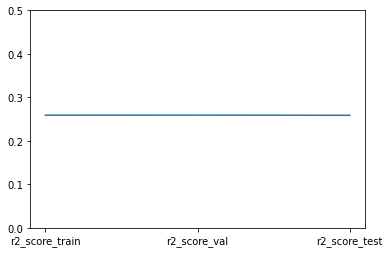

In [94]:
# визуализация полученной точности

plt.plot(df_r2_score)
plt.ylim(0, 0.5)
plt.show()

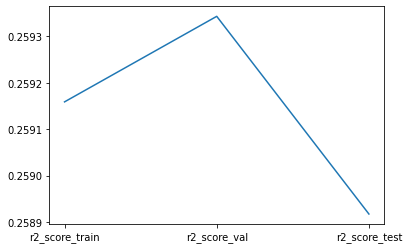

In [65]:
# визуализация полученной точности

plt.plot(df_r2_score)
plt.show()